# Analysis on sales dataset

### Standard libraries import 

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

### Loading sales dataset

In [2]:
dataset = pd.read_csv('sales.txt', delimiter = ';',index_col='retailweek',parse_dates=True )
dataset.head(5)

,country,article,sales,regular_price,current_price,ratio,promo1,promo2
retailweek,,,,,,,,
2014-12-28,Germany,AA1821,62,31.95,25.95,0.812207,1,0
2015-01-04,Germany,AA1821,29,31.95,22.95,0.718310,0,0
2015-01-11,Germany,AA1821,58,31.95,28.95,0.906103,0,0
2015-01-18,Germany,AA1821,49,31.95,29.95,0.937402,0,0
2015-01-25,Germany,AA1821,883,31.95,24.95,0.780908,0,0


## General Overview of sales

In [3]:
dataset.describe()

,sales,regular_price,current_price,ratio,promo1,promo2
count,81426.000000,81426.000000,81426.000000,81426.000000,81426.000000,81426.000000
mean,57.048375,52.620695,28.356811,0.544464,0.065041,0.005060
std,88.506045,35.549601,22.704746,0.192692,0.246599,0.070953
min,1.000000,3.950000,1.950000,0.296482,0.000000,0.000000
25%,10.000000,25.950000,11.950000,0.354839,0.000000,0.000000
50%,26.000000,41.450000,20.950000,0.523526,0.000000,0.000000
75%,65.000000,79.950000,37.950000,0.697322,0.000000,0.000000
max,898.000000,197.950000,197.950000,1.000000,1.000000,1.000000


In [4]:
#Total number of sales
dataset['sales'].sum()

4645221

In [5]:
#Total Current Revenue
Tot_Cur_Rev = dataset['sales'].dot(dataset['current_price'])
Tot_Cur_Rev

115096301.95000017

In [6]:
#Total Regular Revenue
Tot_Reg_Rev = dataset['sales'].dot(dataset['regular_price'])
Tot_Reg_Rev

249274412.94999948

## Stats within country 

In [7]:
By_country = dataset.groupby('country')
By_country.describe()

sales                                                      \
           count       mean        std  min   25%   50%   75%    max   
country                                                                
Austria  28782.0  55.489612  84.990631  1.0  10.0  26.0  64.0  889.0   
France   12669.0  58.396795  92.796293  1.0  10.0  27.0  65.0  898.0   
Germany  39975.0  57.743340  89.574196  1.0  10.0  27.0  66.0  897.0   

        regular_price             ... promo1        promo2                     \
                count       mean  ...    75%  max    count     mean       std   
country                           ...                                           
Austria       28782.0  52.240598  ...    0.0  1.0  28782.0  0.00000  0.000000   
France        12669.0  57.804369  ...    0.0  1.0  12669.0  0.03252  0.177384   
Germany       39975.0  51.251538  ...    0.0  1.0  39975.0  0.00000  0.000000   

                                  
         min  25%  50%  75%  max  
country                           
Austria  0.0  0.0  0.0  0.0  0.0  
France   0.0  0.0  0.0  0.0  1.0  
Germany  0.0  0.0  0.0  0.0  0.0  

[3 rows x 48 columns]

### Germany Overview

In [8]:
dataset_ger = dataset[dataset['country']=='Germany']
dataset_ger.describe()

,sales,regular_price,current_price,ratio,promo1,promo2
count,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.0
mean,57.743340,51.251538,27.543646,0.543421,0.065041,0.0
std,89.574196,32.554762,20.994757,0.192722,0.246601,0.0
min,1.000000,3.950000,1.950000,0.298246,0.000000,0.0
25%,10.000000,25.950000,11.950000,0.354839,0.000000,0.0
50%,27.000000,41.950000,20.950000,0.523242,0.000000,0.0
75%,66.000000,75.950000,36.950000,0.696084,0.000000,0.0
max,897.000000,197.950000,197.950000,1.000000,1.000000,0.0


In [9]:
dataset_ger.sort_values(by='sales',ascending=False).head()

,country,article,sales,regular_price,current_price,ratio,promo1,promo2
retailweek,,,,,,,,
2016-12-18,Germany,KT8964,897,44.95,17.95,0.399333,0,0
2015-01-11,Germany,JB4241,896,48.95,30.95,0.632278,0,0
2015-11-15,Germany,IB8671,895,51.95,15.95,0.307026,0,0
2015-03-22,Germany,PQ4964,891,3.95,1.95,0.493671,0,0
2015-01-11,Germany,SC5839,887,32.95,14.95,0.453718,0,0


### France Overview

In [10]:
dataset_fra = dataset[dataset['country']=='France']
dataset_fra.describe()

,sales,regular_price,current_price,ratio,promo1,promo2
count,12669.000000,12669.000000,12669.000000,12669.000000,12669.000000,12669.000000
mean,58.396795,57.804369,31.190587,0.544334,0.065041,0.032520
std,92.796293,44.004254,27.550537,0.190761,0.246607,0.177384
min,1.000000,3.950000,1.950000,0.298246,0.000000,0.000000
25%,10.000000,26.950000,11.950000,0.355993,0.000000,0.000000
50%,27.000000,41.950000,21.950000,0.520334,0.000000,0.000000
75%,65.000000,88.950000,41.950000,0.691715,0.000000,0.000000
max,898.000000,195.950000,195.950000,1.000000,1.000000,1.000000


In [11]:
dataset_fra.sort_values(by='sales',ascending=False).head()

,country,article,sales,regular_price,current_price,ratio,promo1,promo2
retailweek,,,,,,,,
2016-10-02,France,ZD3611,898,53.95,28.95,0.536608,0,0
2016-04-24,France,WP4135,892,13.95,4.95,0.354839,0,1
2016-01-03,France,OW5968,891,65.95,40.95,0.620925,1,0
2015-04-05,France,CH6937,889,48.95,18.95,0.387130,0,0
2016-11-27,France,CH6937,888,48.95,15.95,0.325843,0,0


### Austria Overview

In [12]:
dataset_aus = dataset[dataset['country']=='Austria']
dataset_aus.describe()

,sales,regular_price,current_price,ratio,promo1,promo2
count,28782.000000,28782.000000,28782.000000,28782.000000,28782.000000,28782.0
mean,55.489612,52.240598,28.238861,0.545970,0.065041,0.0
std,84.990631,35.164224,22.531583,0.193491,0.246602,0.0
min,1.000000,3.950000,1.950000,0.296482,0.000000,0.0
25%,10.000000,25.950000,11.950000,0.358717,0.000000,0.0
50%,26.000000,40.950000,20.950000,0.525692,0.000000,0.0
75%,64.000000,83.950000,38.950000,0.699248,0.000000,0.0
max,889.000000,153.950000,153.950000,1.000000,1.000000,0.0


In [13]:
dataset_aus.sort_values(by='sales',ascending=False).head()

,country,article,sales,regular_price,current_price,ratio,promo1,promo2
retailweek,,,,,,,,
2015-10-25,Austria,ON4163,889,113.95,42.95,0.376920,0,0
2015-01-25,Austria,ST3419,874,95.95,95.95,1.000000,0,0
2016-10-09,Austria,BF7554,870,31.95,9.95,0.311424,0,0
2015-12-27,Austria,NW3584,866,39.95,22.95,0.574468,1,0
2016-05-08,Austria,EZ8648,858,25.95,7.95,0.306358,0,0


## Stats with or without true value of promo1, promo2

### True value for promo1 and promo2 overview 

In [14]:
#Statistics with promo1 and promo2 true
dataset_p1p2_t = dataset[(dataset['promo1']==1)&(dataset['promo2']==1)]
dataset_p1p2_t.describe()

,sales,regular_price,current_price,ratio,promo1,promo2
count,103.000000,103.000000,103.000000,103.000000,103.0,103.0
mean,106.883495,57.804369,41.396602,0.701770,1.0,1.0
std,147.692135,44.217690,34.637543,0.139955,0.0,0.0
min,2.000000,3.950000,2.950000,0.369925,1.0,1.0
25%,14.500000,26.950000,16.450000,0.609020,1.0,1.0
50%,42.000000,41.950000,29.950000,0.720383,1.0,1.0
75%,119.500000,81.450000,55.450000,0.800688,1.0,1.0
max,599.000000,195.950000,167.950000,1.000000,1.0,1.0


### True value of promo1 and false promo2 overview

In [15]:
dataset_p1_t = dataset[(dataset['promo1']==1)&(dataset['promo2']==0)]
dataset_p1_t.describe()

,sales,regular_price,current_price,ratio,promo1,promo2
count,5193.000000,5193.000000,5193.000000,5193.000000,5193.0,5193.0
mean,91.376083,52.517880,34.131398,0.654457,1.0,0.0
std,125.672824,35.357007,25.180661,0.160156,0.0,0.0
min,1.000000,3.950000,1.950000,0.298246,1.0,0.0
25%,17.000000,25.950000,15.950000,0.542203,1.0,0.0
50%,45.000000,40.950000,25.950000,0.659618,1.0,0.0
75%,109.000000,79.950000,47.950000,0.764359,1.0,0.0
max,891.000000,197.950000,195.950000,1.000000,1.0,0.0


### False value of promo1 and True value of promo2 overview

In [16]:
dataset_p2_t = dataset[(dataset['promo1']==0)&(dataset['promo2']==1)]
dataset_p2_t.describe()

,sales,regular_price,current_price,ratio,promo1,promo2
count,309.000000,309.000000,309.000000,309.000000,309.0,309.0
mean,57.407767,57.804369,33.610194,0.594042,0.0,1.0
std,115.858997,44.073892,29.298803,0.212071,0.0,0.0
min,1.000000,3.950000,1.950000,0.298246,0.0,1.0
25%,7.000000,26.950000,11.950000,0.358151,0.0,1.0
50%,20.000000,41.950000,23.950000,0.628942,0.0,1.0
75%,58.000000,88.950000,45.950000,0.757264,0.0,1.0
max,892.000000,195.950000,171.950000,1.000000,0.0,1.0


### False value of promo1 and promo2 overview

In [17]:
dataset_p1p2_f = dataset[(dataset['promo1']==0)&(dataset['promo2']==0)]
dataset_p1p2_f.describe()

,sales,regular_price,current_price,ratio,promo1,promo2
count,75821.000000,75821.000000,75821.000000,75821.000000,75821.0,75821.0
mean,54.628098,52.599569,27.922184,0.536515,0.0,0.0
std,84.599444,35.509502,22.411545,0.192286,0.0,0.0
min,1.000000,3.950000,1.950000,0.296482,0.0,0.0
25%,10.000000,25.950000,11.950000,0.351032,0.0,0.0
50%,26.000000,40.950000,20.950000,0.509704,0.0,0.0
75%,63.000000,79.950000,37.950000,0.687011,0.0,0.0
max,898.000000,197.950000,197.950000,1.000000,0.0,0.0


## Ranking of articles sold 

In [18]:
#Top 5 overall sales
dataset.sort_values('sales', ascending= False).head()

,country,article,sales,regular_price,current_price,ratio,promo1,promo2
retailweek,,,,,,,,
2016-10-02,France,ZD3611,898,53.95,28.95,0.536608,0,0
2016-12-18,Germany,KT8964,897,44.95,17.95,0.399333,0,0
2015-01-11,Germany,JB4241,896,48.95,30.95,0.632278,0,0
2015-11-15,Germany,IB8671,895,51.95,15.95,0.307026,0,0
2016-04-24,France,WP4135,892,13.95,4.95,0.354839,0,1


In [19]:
# 5 Least overall sales
dataset.sort_values('sales',ascending= True).head()

,country,article,sales,regular_price,current_price,ratio,promo1,promo2
retailweek,,,,,,,,
2015-08-09,Germany,FO4538,1,35.95,34.95,0.972184,0,0
2016-08-21,Germany,MR4948,1,20.95,20.95,1.000000,0,0
2015-02-22,Austria,IM2273,1,96.95,71.95,0.742135,0,0
2015-01-04,Austria,IM2273,1,96.95,60.95,0.628675,0,0
2016-08-28,Germany,MR4948,1,20.95,13.95,0.665871,0,0


## Plotting overall sales time series  

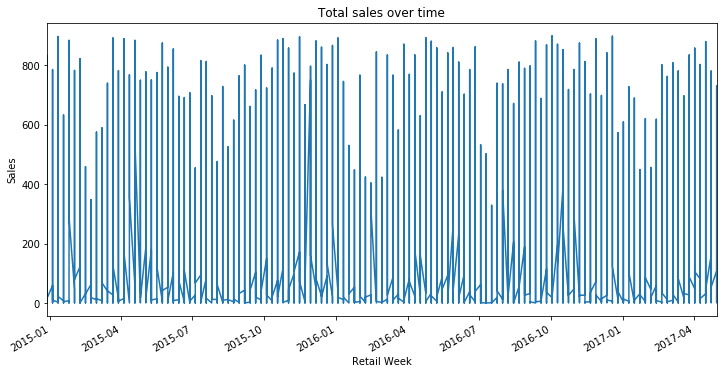

In [20]:
title='Total sales over time'
ylabel='Sales'
xlabel='Retail Week'

ax = dataset['sales'].plot(figsize=(12,6),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

# Checking if the timeseries dataset is stationary or not.

Stationary dataset shows no signs of trends and seasonality

But first we need to create a new dataframe, dataset_unique_week, which combines same dates, add their relative columns with numerical values and stores them.

In [21]:
dataset_unique_week = pd.DataFrame(data= dataset.groupby('retailweek').sum())
#dataset_unique_week.reset_index(inplace=True)

In [ ]:
dataset_unique_week.index

In [15]:
dataset_unique_week.index.freq = 'W'
dataset_unique_week.index

DatetimeIndex(['2014-12-28', '2015-01-04', '2015-01-11', '2015-01-18',
               '2015-01-25', '2015-02-01', '2015-02-08', '2015-02-15',
               '2015-02-22', '2015-03-01',
               ...
               '2017-02-26', '2017-03-05', '2017-03-12', '2017-03-19',
               '2017-03-26', '2017-04-02', '2017-04-09', '2017-04-16',
               '2017-04-23', '2017-04-30'],
              dtype='datetime64[ns]', name='retailweek', length=123, freq='W-SUN')

In [16]:
dataset_unique_week.head()

,sales,regular_price,current_price,ratio,promo1,promo2
retailweek,,,,,,
2014-12-28,67578,34834.9,21260.9,405.285245,662,0
2015-01-04,24676,34834.9,22880.9,440.971589,0,0
2015-01-11,26929,34834.9,24580.9,470.672012,0,0
2015-01-18,20912,34834.9,25715.9,488.332017,0,0
2015-01-25,22109,34834.9,26950.9,515.169986,0,103


In [17]:
dataset_unique_week.tail()

,sales,regular_price,current_price,ratio,promo1,promo2
retailweek,,,,,,
2017-04-02,47338,34834.9,13887.9,267.906536,0,0
2017-04-09,54087,34834.9,12684.9,245.418114,0,0
2017-04-16,52133,34834.9,12329.9,239.756831,0,0
2017-04-23,48610,34834.9,11770.9,229.800771,0,0
2017-04-30,54715,34834.9,11849.9,230.292301,0,0


### Using seasonal decomposition tool provided by statsmodel to seperate out different components within the datapoints and visualize it

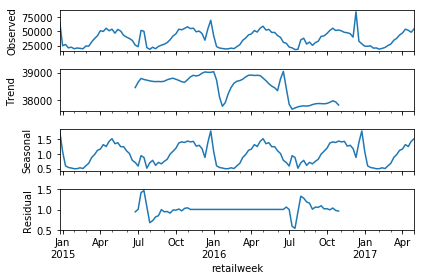

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(dataset_unique_week['sales'], model='multiplicative')  # model='additive' also works
result.plot();

Since our dataset is short across it's time span, we can really say for sure that there is seasonality by just observing above plots. We will use a bit complex method below to analyze further.

### Using triple exponential smoothing aka Holt-Winters-Method for replicating the timeseries data points. It supports both treand and seasonality if persist in data

In [23]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
dataset_unique_week['TESadd52'] = ExponentialSmoothing(dataset_unique_week['sales'],trend='add',seasonal='add',seasonal_periods=52).fit().fittedvalues
dataset_unique_week['TESmul52'] = ExponentialSmoothing(dataset_unique_week['sales'],trend='mul',seasonal='mul',seasonal_periods=52).fit().fittedvalues
dataset_unique_week.head()

,sales,regular_price,current_price,ratio,promo1,promo2,TESadd12,TESmul12,TESadd52,TESmul52
retailweek,,,,,,,,,,
2014-12-28,67578,34834.9,21260.9,405.285245,662,0,67585.692678,285412.516175,67585.692678,285412.516175
2015-01-04,24676,34834.9,22880.9,440.971589,0,0,24690.959168,165157.179333,24690.959168,165157.179333
2015-01-11,26929,34834.9,24580.9,470.672012,0,0,26950.801773,134161.238271,26950.801773,134161.238271
2015-01-18,20912,34834.9,25715.9,488.332017,0,0,20940.223849,63554.071750,20940.223849,63554.071750
2015-01-25,22109,34834.9,26950.9,515.169986,0,103,22143.229738,43705.171910,22143.229738,43705.171910


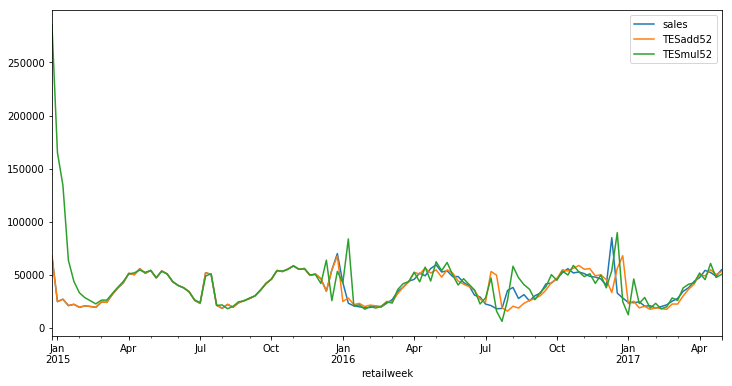

In [24]:
dataset_unique_week[['sales','TESadd52','TESmul52']].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

It appears that holt-winter method seem to fit the datapoints well which accounts for both trends and seasonality in datasets. Let's confirm the stationary test with following method supported my mathematical and cannot fail.  

## Final mathematical test across the whole dataset for stationary 

## Augmented Dickey-Fuller Test
To determine whether a series is stationary we can use the <a href='https://en.wikipedia.org/wiki/Augmented_Dickey-Fuller_test'>augmented Dickey-Fuller Test</a>. In this test the null hypothesis states that $\phi = 1$ (this is also called a unit test). The test returns several statistics we'll see in a moment. Our focus is on the p-value. A small p-value ($p<0.05$) indicates strong evidence against the null hypothesis.

In [27]:
from statsmodels.tsa.stattools import adfuller
print('Augmented Dickey-Fuller Test on Airline Data')
dftest = adfuller(dataset_unique_week['sales'],autolag='AIC')
dftest

Augmented Dickey-Fuller Test on Airline Data


(-5.853434351614161,
 3.545209360565359e-07,
 12,
 110,
 {'1%': -3.4912451337340342,
  '5%': -2.8881954545454547,
  '10%': -2.5809876033057852},
 2295.732293558231)

In [28]:
print('Augmented Dickey-Fuller Test on Sales Data')

dfout = pd.Series(dftest[0:4],index=['ADF test statistic','p-value','# lags used','# observations'])

for key,val in dftest[4].items():
    dfout[f'critical value ({key})']=val
print(dfout)

Augmented Dickey-Fuller Test on Sales Data
ADF test statistic     -5.853434e+00
p-value                 3.545209e-07
# lags used             1.200000e+01
# observations          1.100000e+02
critical value (1%)    -3.491245e+00
critical value (5%)    -2.888195e+00
critical value (10%)   -2.580988e+00
dtype: float64


## In our case, the p-value is very low at 0.00000035, and we do reject the null hypothesis. This dataset appears to have no unit root, and is stationary therefore it does not contain any trends or seasonality.